In [31]:
import sys
sys.path.append("C:/Users/Simon Schneider/DataspellProjects/peexcel")

C:\Users\Simon Schneider\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001E9C508EB80> has a label of '_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


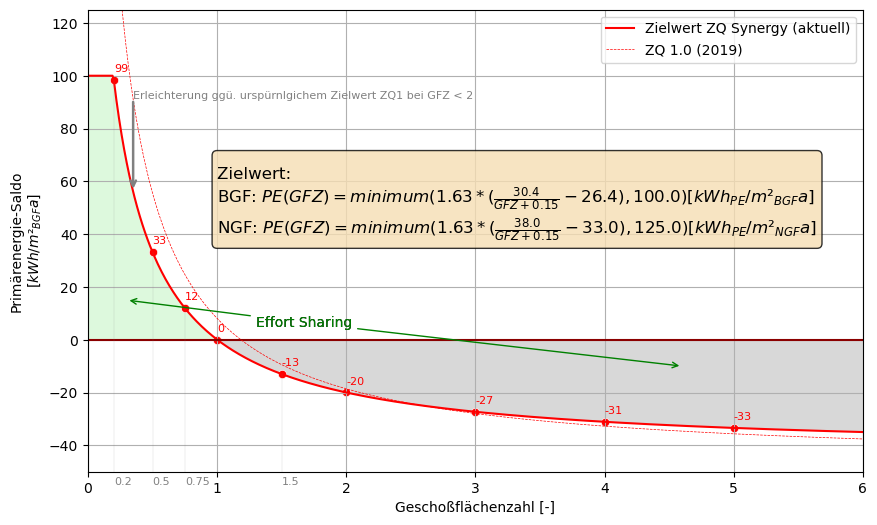

In [32]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import logging

logging.level=logging.WARNING

import utils.targets
from utils.plotting import target_of_gfz

zq_zielwert = utils.targets.Zielwert.ZQSynergy()
zq_zielwert.set_reference("BGF")
zq1 = utils.targets.Zielwert.ZQ1()
GFZ = np.linspace(0,6,600)
zw_df = pd.DataFrame()
label = "Zielwert ZQ Synergy (aktuell)"
zw_df[label] = zq_zielwert.df(GFZ)
zw_df["_"] = np.zeros(len(GFZ))
zw_df_old = pd.DataFrame()
zw_df_old["ZQ 1.0 (2019)"] = zq1.df(GFZ)
fig, ax = plt.subplots(1,1, figsize=(10,6))
target_of_gfz(ax, df=zw_df, xlims=(0,6), ylims=(-50,125), color=["red", "darkred"])
# zq1.set_reference("BGF")
target_of_gfz(ax, df=zw_df_old, xlims=(0,6), ylims=(-50,125), color=["red", "darkred"], linewidth=0.5, linestyle="dashed")
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
zq_zielwert.set_reference("BGF")
text = "\nZielwert: \n"
text += "BGF: "+zq_zielwert.formula() +"\n"
zq_zielwert.set_reference("NGF")
text += "NGF: "+zq_zielwert.formula()
ax.text(1, 40, text, fontsize=12, bbox=props)
zq_zielwert.set_reference("BGF")

x, y1, y2 = GFZ, zw_df["_"], zw_df[label]
ax.fill_between(x, y1, y2, where=y2 >= y1,
                facecolor='lightgreen', interpolate=True,  alpha = 0.3)
ax.fill_between(x, y1, y2, where=y2 <= y1,
                facecolor='grey', interpolate=True, alpha = 0.3)
ax.set_ylabel("Primärenergie-Saldo\n[$kWh/m²_{BGF}a$]")
arrow_props=dict(arrowstyle="->", color="green")
ax.annotate("Effort Sharing", xy=(0.3, 15), xytext=(1.3, 5),
            arrowprops=arrow_props)
ax.annotate("Effort Sharing", xy=(4.6, -10), xytext=(1.3, 5),
            arrowprops=arrow_props, color="green")

arrow_props=dict(arrowstyle="->", color="grey", linewidth=1.8)
pos = 0.35
ax.annotate("", xy=(pos, zq_zielwert.alpha(pos)), xytext=(pos, zq1.alpha(pos)),
            arrowprops=arrow_props)
t = "Erleichterung ggü. urspürnlgichem Zielwert ZQ1 bei GFZ < 2"
ax.annotate(t, xy=(pos, (zq1.alpha(pos)+zq_zielwert.alpha(pos))/2),
            xytext=(pos, zq1.alpha(pos)),
            arrowprops=dict(arrowstyle="-", color="None", linewidth=0.3),
            fontsize=8, color="grey")


sel = np.array([0.2,0.5, 0.75, 1, 1.5, 2, 3, 4, 5])

points = np.array(zq_zielwert.alpha(sel))
sns.scatterplot(x=sel, y=points, ax=ax, color="red")
for i, gfz in enumerate(sel):
    y = zq_zielwert.alpha(gfz)
    if gfz < 2 and gfz != 1:
        ax.plot((gfz, gfz),(-100,y), linewidth=0.1, color="grey")
        ax.text(gfz, -55, round(gfz,2), fontsize=8, color="grey")
    ax.text(gfz, round(y,1)+3, str(round(y)),
            fontsize=8, color="red")


plt.savefig("Zielwert_Darstellung.png", dpi=300)

C:\Users\Simon Schneider\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001E9C39AD5B0> has a label of '_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


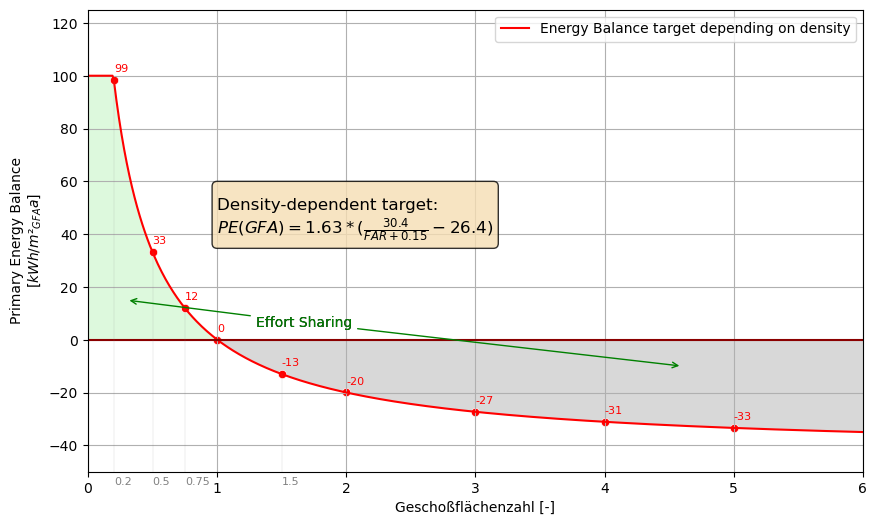

In [33]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import logging

logging.level=logging.WARNING

import utils.targets
from utils.plotting import target_of_gfz

zq_zielwert = utils.targets.Zielwert.ZQSynergy()
zq_zielwert.set_reference("BGF")
zq1 = utils.targets.Zielwert.ZQ1()
GFZ = np.linspace(0,6,600)
zw_df = pd.DataFrame()
label = "Energy Balance target depending on density"
zw_df[label] = zq_zielwert.df(GFZ)
zw_df["_"] = np.zeros(len(GFZ))
#zw_df_old = pd.DataFrame()
#zw_df_old["ZQ 1.0 (2019)"] = zq1.df(GFZ)
fig, ax = plt.subplots(1,1, figsize=(10,6))
target_of_gfz(ax, df=zw_df, xlims=(0,6), ylims=(-50,125), color=["red", "darkred"])
# zq1.set_reference("BGF")
#target_of_gfz(ax, df=zw_df_old, xlims=(0,6), ylims=(-50,125), color=["red", "darkred"], linewidth=0.5, linestyle="dashed")
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
zq_zielwert.set_reference("BGF")
text = "\nDensity-dependent target: \n"
text += '$PE(GFA) = 1.63 * (\\frac{30.4}{FAR + 0.15} - 26.4)$'
ax.text(1, 40, text, fontsize=12, bbox=props)

x, y1, y2 = GFZ, zw_df["_"], zw_df[label]
ax.fill_between(x, y1, y2, where=y2 >= y1,
                facecolor='lightgreen', interpolate=True,  alpha = 0.3)
ax.fill_between(x, y1, y2, where=y2 <= y1,
                facecolor='grey', interpolate=True, alpha = 0.3)
ax.set_ylabel("Primary Energy Balance\n[$kWh/m²_{GFA}a$]")
arrow_props=dict(arrowstyle="->", color="green")
ax.annotate("Effort Sharing", xy=(0.3, 15), xytext=(1.3, 5),
            arrowprops=arrow_props)
ax.annotate("Effort Sharing", xy=(4.6, -10), xytext=(1.3, 5),
            arrowprops=arrow_props, color="green")



sel = np.array([0.2,0.5, 0.75, 1, 1.5, 2, 3, 4, 5])

points = np.array(zq_zielwert.alpha(sel))
sns.scatterplot(x=sel, y=points, ax=ax, color="red")
for i, gfz in enumerate(sel):
    y = zq_zielwert.alpha(gfz)
    if gfz < 2 and gfz != 1:
        ax.plot((gfz, gfz),(-100,y), linewidth=0.1, color="grey")
        ax.text(gfz, -55, round(gfz,2), fontsize=8, color="grey")
    ax.text(gfz, round(y,1)+3, str(round(y)),
            fontsize=8, color="red")


plt.savefig("ZW_en.png", dpi=300)

In [ ]:
'$PE(GFA) = 1.63 * (\\frac{30.4}{FAR + 0.15} - 26.4)$'

In [ ]:
target_of_gfz(ax, df=zw_df, xlims=(0,6), ylims=(-50,125), color=["red", "darkred"])

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import logging

logging.level=logging.WARNING

import utils.targets
from utils.plotting import target_of_gfz

zq_zielwert = utils.targets.Zielwert.ZQSynergy()
zq_zielwert.set_reference("BGF")
zq1 = utils.targets.Zielwert.ZQ1()
GFZ = np.linspace(0,6,600)
zw_df = pd.DataFrame()
label = "Energy Balance target depending on density"
zw_df[label] = zq_zielwert.df(GFZ)
zw_df["_"] = np.zeros(len(GFZ))
#zw_df_old = pd.DataFrame()
#zw_df_old["ZQ 1.0 (2019)"] = zq1.df(GFZ)
fig, ax = plt.subplots(1,1, figsize=(10,6))
target_of_gfz(ax, df=zw_df, xlims=(0,6), ylims=(-50,125), color=["red", "darkred"])
# zq1.set_reference("BGF")
#target_of_gfz(ax, df=zw_df_old, xlims=(0,6), ylims=(-50,125), color=["red", "darkred"], linewidth=0.5, linestyle="dashed")
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
zq_zielwert.set_reference("BGF")
text = "\nDensity-dependent target: \n"
text += '$PE(GFA) = 1.63 * (\\frac{30.4}{FAR + 0.15} - 26.4)$'
ax.text(1, 40, text, fontsize=12, bbox=props)

x, y1, y2 = GFZ, zw_df["_"], zw_df[label]
ax.fill_between(x, y1, y2, where=y2 >= y1,
                facecolor='lightgreen', interpolate=True,  alpha = 0.3)
ax.fill_between(x, y1, y2, where=y2 <= y1,
                facecolor='grey', interpolate=True, alpha = 0.3)
ax.set_ylabel("Primary Energy Balance\n[$kWh/m²_{GFA}a$]")
arrow_props=dict(arrowstyle="->", color="green")
ax.annotate("Effort Sharing", xy=(0.3, 15), xytext=(1.3, 5),
            arrowprops=arrow_props)
ax.annotate("Effort Sharing", xy=(4.6, -10), xytext=(1.3, 5),
            arrowprops=arrow_props, color="green")



sel = np.array([0.2,0.5, 0.75, 1, 1.5, 2, 3, 4, 5])

points = np.array(zq_zielwert.alpha(sel))
sns.scatterplot(x=sel, y=points, ax=ax, color="red")
for i, gfz in enumerate(sel):
    y = zq_zielwert.alpha(gfz)
    if gfz < 2 and gfz != 1:
        ax.plot((gfz, gfz),(-100,y), linewidth=0.1, color="grey")
        ax.text(gfz, -55, round(gfz,2), fontsize=8, color="grey")
    ax.text(gfz, round(y,1)+3, str(round(y)),
            fontsize=8, color="red")


plt.savefig("ZW_en.png", dpi=300)

In [ ]:
'$PE(GFA) = 1.63 * (\\frac{30.4}{FAR + 0.15} - 26.4)$'

In [ ]:
target_of_gfz(ax, df=zw_df, xlims=(0,6), ylims=(-50,125), color=["red", "darkred"])

C:\Users\Simon Schneider\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001E9C3960CD0> has a label of '_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


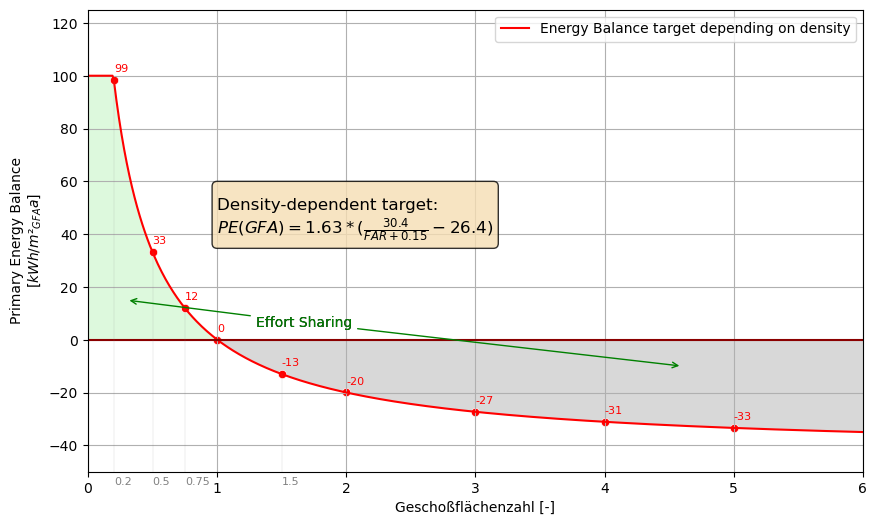

In [25]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import logging

logging.level=logging.WARNING

import utils.targets
from utils.plotting import target_of_gfz

zq_zielwert = utils.targets.Zielwert.ZQSynergy()
zq_zielwert.set_reference("BGF")
zq1 = utils.targets.Zielwert.ZQ1()
GFZ = np.linspace(0,6,600)
zw_df = pd.DataFrame()
label = "Energy Balance target depending on density"
zw_df[label] = zq_zielwert.df(GFZ)
zw_df["_"] = np.zeros(len(GFZ))
#zw_df_old = pd.DataFrame()
#zw_df_old["ZQ 1.0 (2019)"] = zq1.df(GFZ)
fig, ax = plt.subplots(1,1, figsize=(10,6))
target_of_gfz(ax, df=zw_df, xlims=(0,6), ylims=(-50,125), color=["red", "darkred"])
# zq1.set_reference("BGF")
#target_of_gfz(ax, df=zw_df_old, xlims=(0,6), ylims=(-50,125), color=["red", "darkred"], linewidth=0.5, linestyle="dashed")
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
zq_zielwert.set_reference("BGF")
text = "\nDensity-dependent target: \n"
text += '$PE(GFA) = 1.63 * (\\frac{30.4}{FAR + 0.15} - 26.4)$'
ax.text(1, 40, text, fontsize=12, bbox=props)

x, y1, y2 = GFZ, zw_df["_"], zw_df[label]
ax.fill_between(x, y1, y2, where=y2 >= y1,
                facecolor='lightgreen', interpolate=True,  alpha = 0.3)
ax.fill_between(x, y1, y2, where=y2 <= y1,
                facecolor='grey', interpolate=True, alpha = 0.3)
ax.set_ylabel("Primary Energy Balance\n[$kWh/m²_{GFA}a$]")
arrow_props=dict(arrowstyle="->", color="green")
ax.annotate("Effort Sharing", xy=(0.3, 15), xytext=(1.3, 5),
            arrowprops=arrow_props)
ax.annotate("Effort Sharing", xy=(4.6, -10), xytext=(1.3, 5),
            arrowprops=arrow_props, color="green")



sel = np.array([0.2,0.5, 0.75, 1, 1.5, 2, 3, 4, 5])

points = np.array(zq_zielwert.alpha(sel))
sns.scatterplot(x=sel, y=points, ax=ax, color="red")
for i, gfz in enumerate(sel):
    y = zq_zielwert.alpha(gfz)
    if gfz < 2 and gfz != 1:
        ax.plot((gfz, gfz),(-100,y), linewidth=0.1, color="grey")
        ax.text(gfz, -55, round(gfz,2), fontsize=8, color="grey")
    ax.text(gfz, round(y,1)+3, str(round(y)),
            fontsize=8, color="red")


plt.savefig("ZW_en.png", dpi=300)

In [22]:
'$PE(GFA) = 1.63 * (\\frac{30.4}{FAR + 0.15} - 26.4)$'

'$PE(GFA) = 1.63 * (\\frac{30.4}{GFZ + 0.15} - 26.4)$'

In [28]:
target_of_gfz(ax, df=zw_df, xlims=(0,6), ylims=(-50,125), color=["red", "darkred"])

C:\Users\Simon Schneider\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001E9C4EFB2B0> has a label of '_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
